# Problem Definition and Detection algorithm

## Problem definition
1. difference between panchromatic and multi-spectral
2. Data Characteristics
a. Spatial resolution
b. Centre and Width of Spatial Channels
x. Size, shape, color



## Design

1. Chosen image and area of interest
2. Image Enhancement (Math Morpology)
3. Detect image: Edge detection or classification
4. Count number of tents



In [ ]:
"""
ENGO659: Digital Imaging and Applications
Project 2: Counting Tents in a Refugee Camp.

Written by: Veronica Obodozie
Date: 17-Feb-2025 

REFERENCES:
reviewing raster files: https://automating-gis-processes.github.io/CSC18/lessons/L6/plotting-raster.html

"""

In [1]:
# Import important packages/ Libraries


#---------------------OPEN CV----------------------------#
import cv2

# Other
from PIL import Image
from rasterio.plot import show
import numpy as np
import os

# Important classes
import rasterio

from matplotlib import pyplot


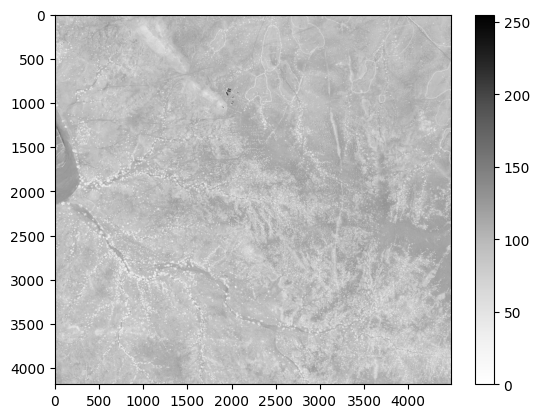

In [2]:
# CHAD Example for viewing image
filename = r"C:\Users\Veron\OneDrive\GitHub\ENGO659\Proj2\Chad-Mille-QB-4.tif"
filename #here we have just allocated the string to the filename object


raster_image = rasterio.open(filename)

# Example
# Let's just get our blue band
blue = raster_image.read()[0]

# Use imshow to load the blue band.
fig = pyplot.imshow(blue, cmap="Greys")

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

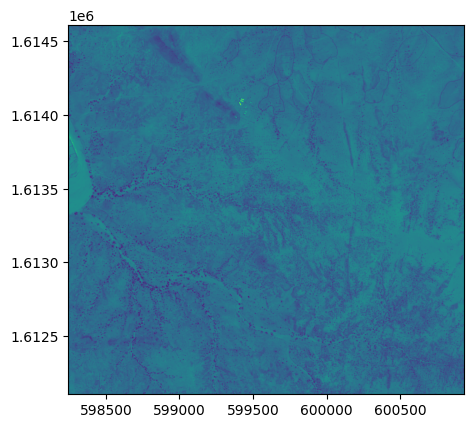

<Axes: >

In [3]:
# Show using raster
show(raster_image)

In [4]:
# Show metadata of image
raster_image.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 4481,
 'height': 4185,
 'count': 1,
 'crs': CRS.from_epsg(32634),
 'transform': Affine(0.599982, 0.0, 598244.3519240001,
        0.0, -0.599982, 1614613.257916)}

In [ ]:
raster_image.bounds

BoundingBox(left=598244.3519240001, bottom=1612102.3332459999, right=600932.8712660001, top=1614613.257916)

In [15]:
## INFO from file
print("Number of bands: ", raster_image.count)
#print("data Type: ", raster_image.dtype)
print("Coordinate Reference System of this image: ", raster_image.crs)

# random data
print("XY: ", raster_image.xy)
print('Stats')
print(raster_image.statistics)
#print("description: ", raster_image.description)
print("Overview: ")
print(raster_image.overviews)
print("Shape: ", raster_image.shape)
# indexes are for bands, which starts from 1 in GDAL

# Clip
#raster_image.overviews

Number of bands:  1
Coordinate Reference System of this image:  EPSG:32634
XY:  <bound method TransformMethodsMixin.xy of <open DatasetReader name='C:/Users/Veron/OneDrive/GitHub/ENGO659/Proj2/Chad-Mille-QB-4.tif' mode='r'>>
Stats
<bound method DatasetReaderBase.statistics of <open DatasetReader name='C:/Users/Veron/OneDrive/GitHub/ENGO659/Proj2/Chad-Mille-QB-4.tif' mode='r'>>
Overview: 
<bound method DatasetBase.overviews of <open DatasetReader name='C:/Users/Veron/OneDrive/GitHub/ENGO659/Proj2/Chad-Mille-QB-4.tif' mode='r'>>
Shape:  (4185, 4481)


In [16]:
raster_image.statistics

<bound method DatasetReaderBase.statistics of <open DatasetReader name='C:/Users/Veron/OneDrive/GitHub/ENGO659/Proj2/Chad-Mille-QB-4.tif' mode='r'>>

# Selecting image and area
This section is to properly select an image and area for the project.

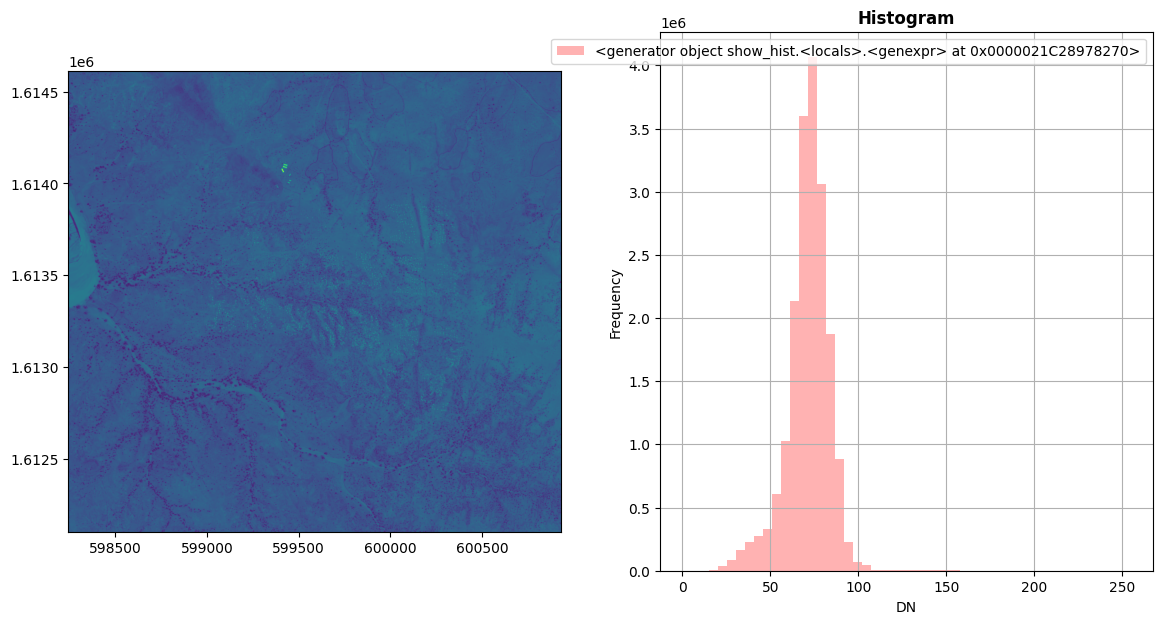

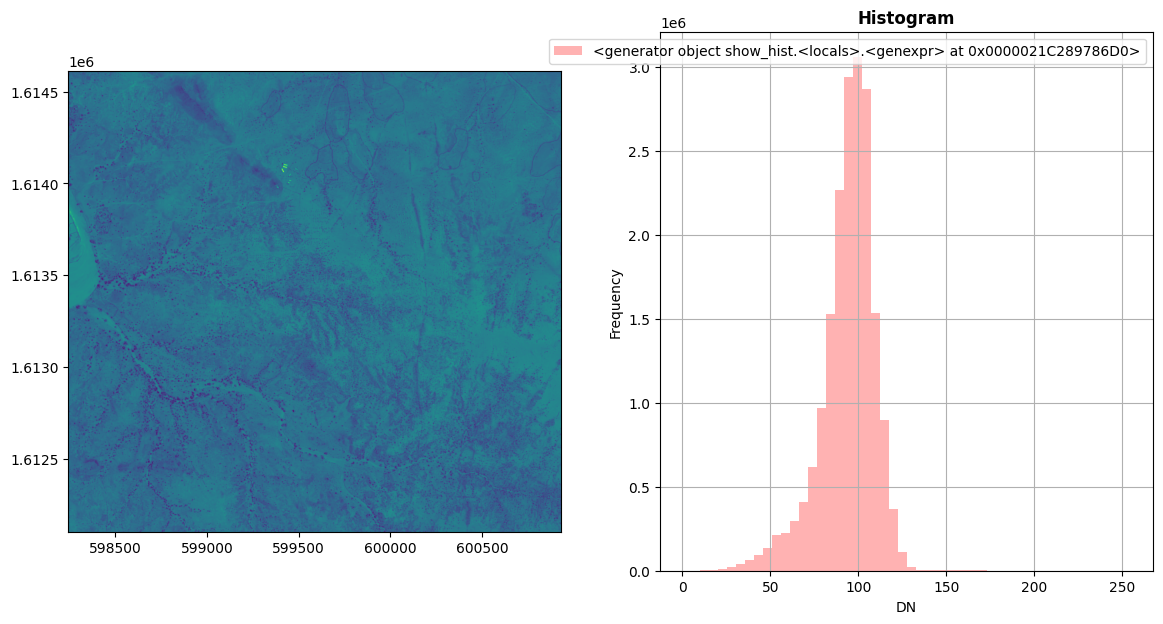

In [20]:
QB2 = rasterio.open(r"C:\Users\Veron\OneDrive\GitHub\ENGO659\Proj2\Chad-Mille-QB-2.tif")
QB4 = rasterio.open(r"C:\Users\Veron\OneDrive\GitHub\ENGO659\Proj2\Chad-Mille-QB-4.tif")
from rasterio.plot import show_hist

# QB2
fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
show(QB2, ax=axrgb)
show_hist(QB2, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3, ax=axhist)
pyplot.show()

# QB4
fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
show(QB4, ax=axrgb)
show_hist(QB4, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3, ax=axhist)
pyplot.show()

# Tryimg to crop desired section
## Using Rasterio

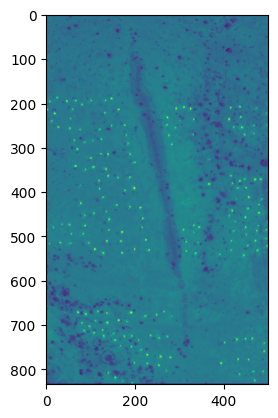

<Axes: >

In [ ]:
# Set the 
from rasterio.mask import mask
QB2 = rasterio.open(r"C:\Users\Veron\OneDrive\GitHub\ENGO659\Proj2\Chad-Mille-QB-2.tif")

# Mask things
# [60000, 16135, 600300, 16140]
#coords = {'type': 'Polygon', 'coordinates': [[[735275.3533476054, 6658919.843253607], [732783.5561207401, 6697846.086795722], [698608.1329965619, 6695816.080575279], [700733.5832412266, 6656875.248540204], [735275.3533476054, 6658919.843253607]]]}]
coords = [{'type': 'Polygon', 'coordinates': [[[600000, 1613500], [600300, 1613500], [600300, 1614000], [600300, 1614000], [600000, 1614000]]]}]
out_image, out_transform = mask(QB2, shapes=coords, crop=True)
show(out_image)

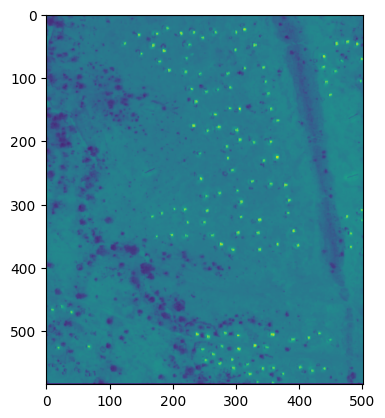

<Axes: >

In [8]:
# Set the Mask

# Mask things
# [60000, 16135, 600200, 1613850]
#coords = {'type': 'Polygon', 'coordinates': [[[735275.3533476054, 6658919.843253607], [732783.5561207401, 6697846.086795722], [698608.1329965619, 6695816.080575279], [700733.5832412266, 6656875.248540204], [735275.3533476054, 6658919.843253607]]]}]
coords = [{'type': 'Polygon', 'coordinates': [[[599900, 1613550], [600200, 1613550], [600200, 1613900], [600200, 1613900], [599900, 1613900]]]}]
out_image, out_transform = mask(QB2, shapes=coords, crop=True)
show(out_image)

## PIL works better

In [18]:
from PIL import Image
img_pil = Image.open(r"C:\Users\Veron\OneDrive\GitHub\ENGO659\Proj2\Chad-Mille-QB-2.tif")
img_pil.show()

In [27]:
cropped_image = img_pil.crop((2679, 1038, 3357, 1670))
#(599900, 1613900, 600200, 1613550)
#(left, top, right, bottom)
 
# Shows the image in image viewer
cropped_image.save('cropped_image.png')

# Image Enhancement
1. Trying Math Morphology
Opening-> opening by reconstruction -> tophat by reconstruction-> lower/double threshold?
Hit or miss transformation

MM dialated 3x3, Open 2x2, Tophat transform?


2. Filters? Median? LaplacianGaussian?


In [ ]:
# Image Enhancement and 
img = cv2.imread('cropped_image.png')
import matplotlib.pyplot as plt

In [49]:
# MM
# Creating appropriate structuring element
strel5x5= cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strel2x2= cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
strel3x3= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

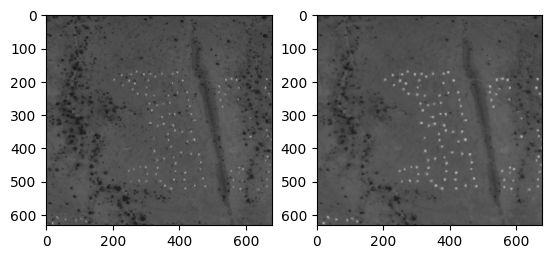

In [ ]:
# Math Morphology
# dialated 3x3
dilateMM = cv2.dilate(img, strel3x3)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(dilateMM)
plt.show()

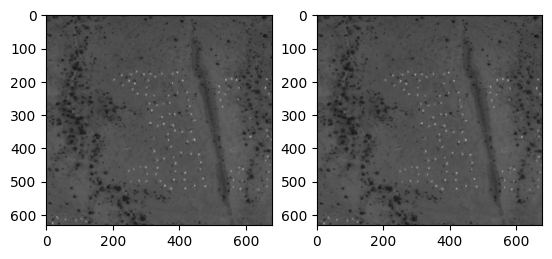

In [56]:
# Opening
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, strel2x2)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(opening)
plt.show()

In [62]:
# Try Opening by reconstruction
# reconstruction function gotten from: 
def imreconstruct(marker, mask, strel):
    """Iteratively expand the markers white keeping them limited by the mask during each iteration.

    mask = original image
    marker = eroded image
    pstrel : the strel kernel
    :returns A copy of the last expansion.
    Written By Semnodime, edited by Neronica.
    """
    kernel = strel
    while True:
        expanded = cv2.dilate(src=marker, kernel=kernel)
        cv2.bitwise_and(src1=expanded, src2=mask, dst=expanded)

        # Termination criterion: Expansion didn't change the image at all
        if (marker == expanded).all():
            return expanded
        marker = expanded



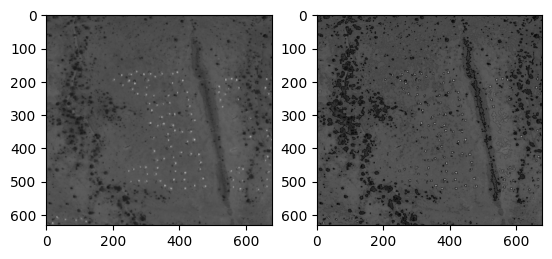

In [63]:
# Opening by Reconstruction
# Erode image
marker= cv2.erode(img, strel2x2)
# Reconstruction
recnstructed_image = imreconstruct(marker, img, strel3x3)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(recnstructed_image)
plt.show()

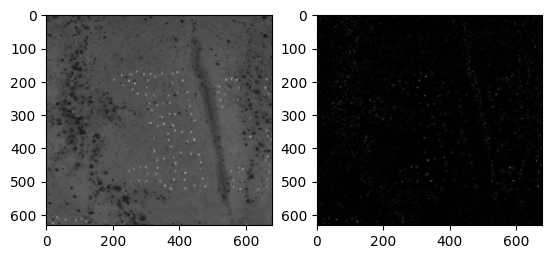

In [ ]:
# TopHat
#tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, strel5x5)
#tophat = cv2.morphologyEx(dilateMM, cv2.MORPH_TOPHAT, strel3x3)
tophat = cv2.morphologyEx(recnstructed_image, cv2.MORPH_TOPHAT, strel3x3)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(tophat)
plt.show()

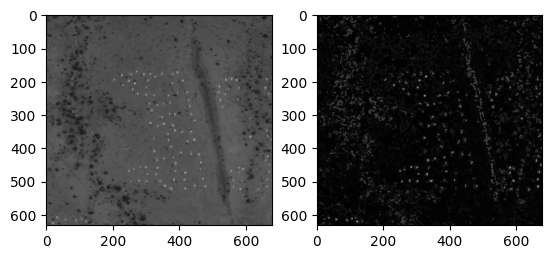

In [65]:
dilatetphat = cv2.dilate(tophat, strel3x3)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(dilatetphat)
plt.show()

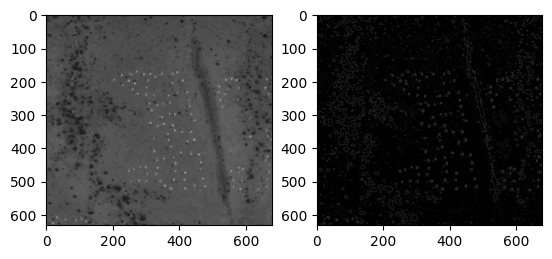

In [73]:
# Try Opening -> Reconstruct -> TopHat
# Dilate to Open
#dilatetphat = cv2.dilate(img, strel3x3)
dilatetphat= cv2.morphologyEx(img, cv2.MORPH_OPEN, strel2x2)
# Opening by Reconstruction
# Erode image
erodeMarker= cv2.erode(dilatetphat, strel2x2)
# Reconstruction
recnstructed_image = imreconstruct(erodeMarker, dilatetphat, strel3x3)
# TopHat
ORtophat = dilatetphat-recnstructed_image#cv2.morphologyEx(recnstructed_image, cv2.MORPH_TOPHAT, strel3x3)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(ORtophat)
plt.show()

In [ ]:
# try with OG image and dilation at end

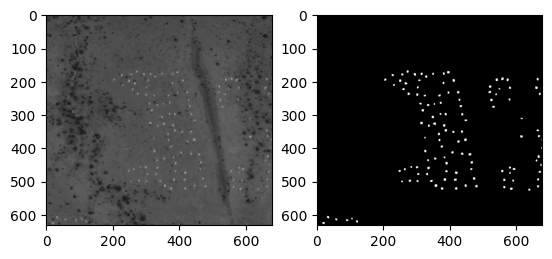

In [83]:
# Attempt thresholding
#adaptive
# img2 = cv2.medianBlur(img,5)
# gray = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 3, 3)
# plt.imshow(gray)

# # Gaussian, Otsu's thresholding
# blur = cv2.GaussianBlur(img,(5,5),0)
# ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plt.imshow(th3)

ret, thresh = cv2.threshold(dilateMM, 127, 255, cv2.THRESH_BINARY)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(thresh)
plt.show()

In [58]:
# Hit or Miss
hitmiss = cv2.morphologyEx(img, cv2.MORPH_HITMISS, strel3x3)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(hitmiss)
plt.show()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\morph.dispatch.cpp:1224: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::morphologyEx'


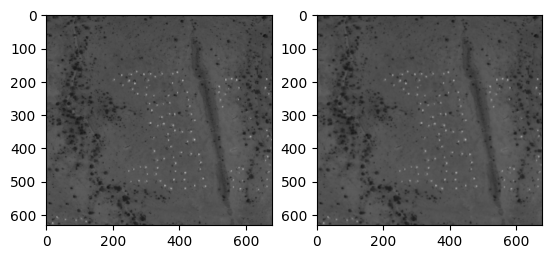

In [45]:
gausBlur = cv2.GaussianBlur(img, (3, 3), 0)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(gausBlur)
plt.show()

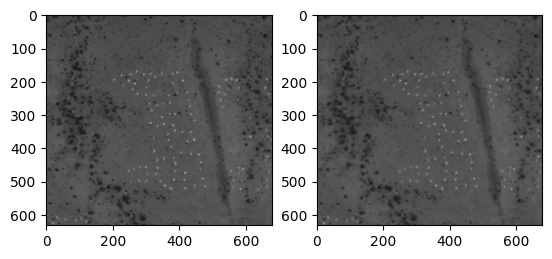

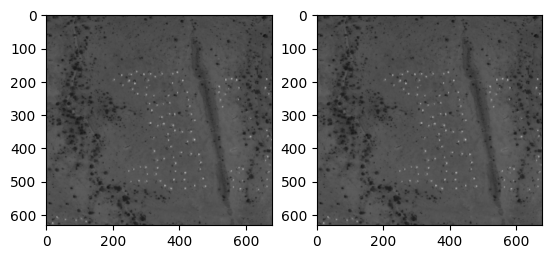

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


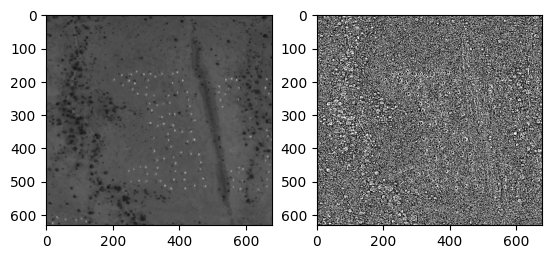

In [ ]:
# Filters

#  Gausian
gausBlur = cv2.GaussianBlur(img, (5, 5), 0)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(gausBlur)
plt.show()

# Median
medBlur = cv2.medianBlur(img, 1)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(medBlur)
plt.show()

# Laplacian
lapBlur = cv2.Laplacian(img,cv2.CV_64F)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lapBlur)
plt.show()


In [40]:
gausBlur.dtype

dtype('uint8')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


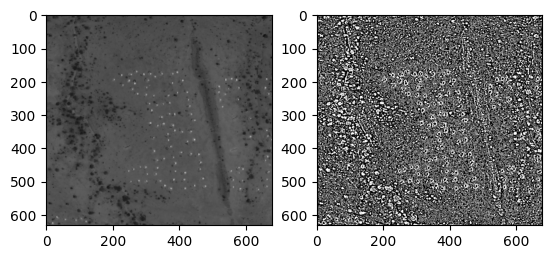

In [ ]:
# Trying an LoG
LoG = cv2.Laplacian(gausBlur,cv2.CV_32F)
# tried CV_8U, CV_16U, CV_32F
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(LoG)
plt.show()

Based on Dilated and thresholded image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


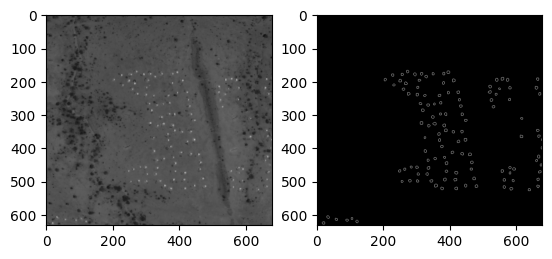

In [ ]:
# Trying an LoG
LoG = cv2.Laplacian(thresh,cv2.CV_32F)
# tried CV_8U, CV_16U, CV_32F
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(LoG)
plt.show()

# Edge Detection

* Canny Filter: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
* Line Segment Detection
* Hough Transform 
* Watershed

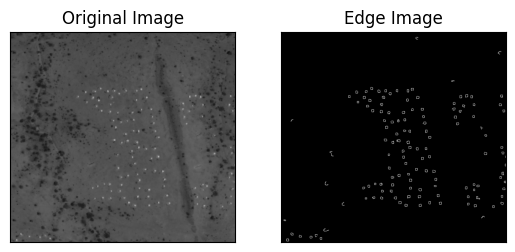

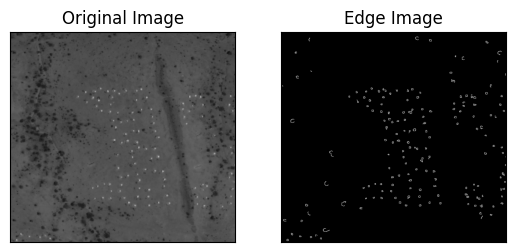

In [ ]:
# Canny Edge detector
edges = cv2.Canny(dilateMM,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Dilated Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Finding contour

In [91]:
dilateMM.dtype

dtype('uint8')

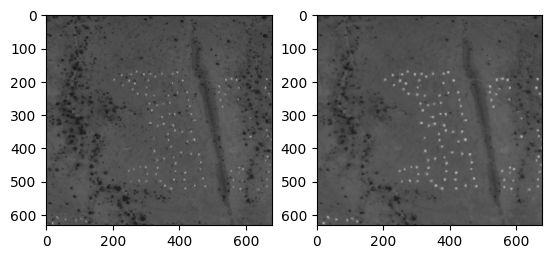

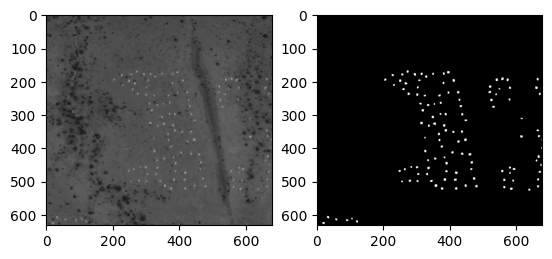

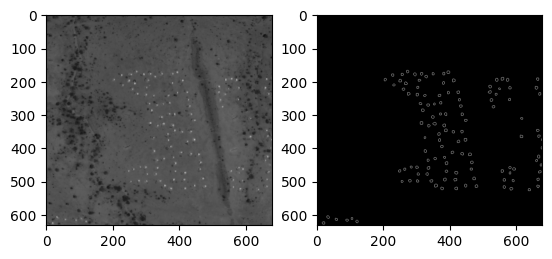

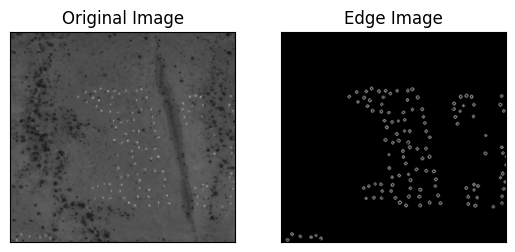

coins in the image :  657


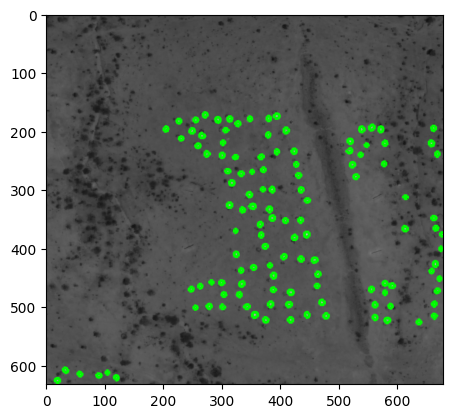

In [ ]:
# Read cropped image
img = cv2.imread('cropped_image.png')
import matplotlib.pyplot as plt

# Dilate cropped image
# Math Morphology
# Creating appropriate structuring element
strel5x5= cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
strel2x2= cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
strel3x3= cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# dialated 3x3
dilateMM = cv2.dilate(img, strel3x3)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(dilateMM)
plt.show()

# Threshold? Gaussian? Laplacian?
# thresholding
ret, thresh = cv2.threshold(dilateMM, 127, 255, cv2.THRESH_BINARY)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(thresh)
plt.show()

# Filters
# Trying an LoG
LoG = cv2.Laplacian(thresh,cv2.CV_8U)
# tried CV_8U, CV_16U, CV_32F
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(LoG)
plt.show()

# Edge Detection: Canny: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html? HoughLines?
edges = cv2.Canny(LoG,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#Count: https://www.geeksforgeeks.org/count-number-of-object-using-python-opencv/
(cnt, hierarchy) = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
plt.imshow(rgb)
print("# of tents : ", len(cnt))

coins in the image :  174


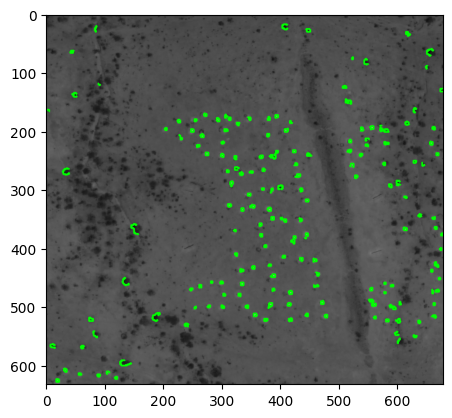

In [ ]:
(cnt, hierarchy) = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
plt.imshow(rgb)
print("Tent count : ", len(cnt))

# Counting number of tents using
Simpleblob
find contour

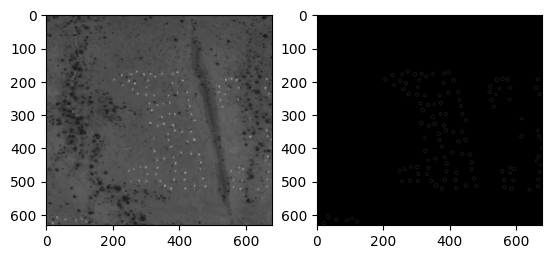

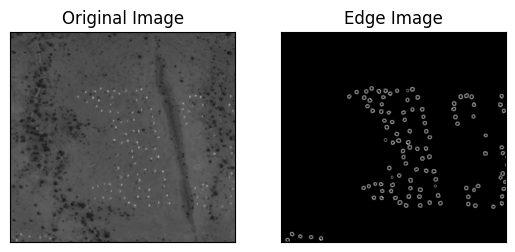

coins in the image :  111


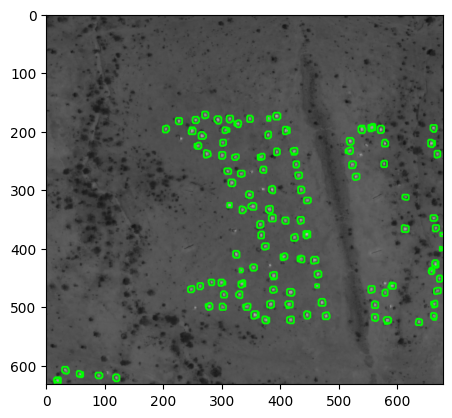

In [ ]:
# Trying to fix the counter
gausBlur = cv2.GaussianBlur(thresh, (5, 5), 0)
# Filters
# Trying an LoG
LoG = cv2.Laplacian(gausBlur,cv2.CV_8U)
# tried CV_8U, CV_16U, CV_32F
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(LoG)
plt.show()

# Edge Detection: Canny: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html? HoughLines?
edges = cv2.Canny(LoG,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#Count: https://www.geeksforgeeks.org/count-number-of-object-using-python-opencv/
(cnt, hierarchy) = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
plt.imshow(rgb)
print("tnts in the image : ", len(cnt))